## Style 1

In [1]:
import numpy as np
import cv2
from PIL import Image

In [59]:
img = cv2.imread('./data/input/content/2022-01-01_39.jpg', cv2.IMREAD_GRAYSCALE)

max_width = 512
new_hieght = int((max_width/img.shape[1])*img.shape[0])
img = cv2.resize(img,((max_width,new_hieght)))


# find some percentiles for grayscale range of src image
percentiles = np.percentile(img, [0, 25, 75, 100])

# define the same count of values to further interpolation
targets = np.geomspace(20,255, 4)

# use interpolation from percentiles to targets for blue and red
b = np.interp(img, percentiles, targets).astype(np.uint8)
g = np.zeros_like(img)
r = np.interp(img, percentiles, targets[::-1]).astype(np.uint8)

# merge channels to BGR image
result = cv2.merge([b, g, r])

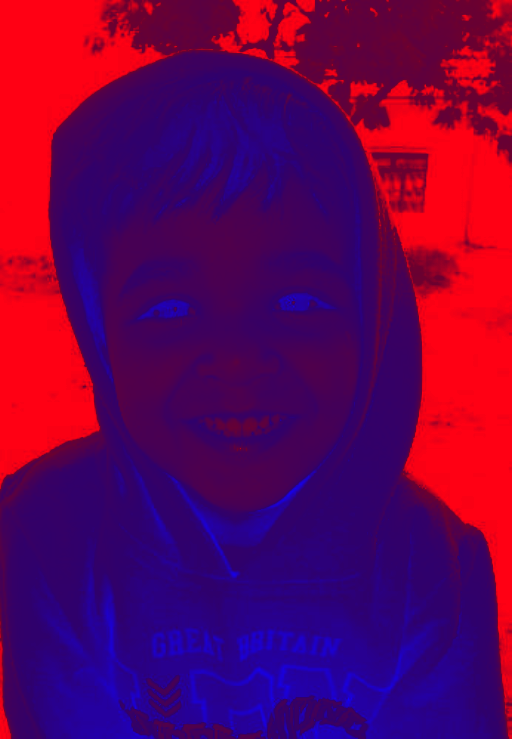

In [60]:
Image.fromarray(result)

## Style 2 (segmentation)

In [27]:
import cv2
import numpy as np

In [28]:
def quantimage(imageP,k):
    image = cv2.cvtColor(cv2.imread(imageP),cv2.COLOR_BGR2RGB)
    max_width = 512
    new_hieght = int((max_width/image.shape[1])*image.shape[0])
    image = cv2.resize(image,((max_width,new_hieght)))

    i = np.float32(image).reshape(-1,3)
    condition = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER,20,1.0)
    ret,label,center = cv2.kmeans(i, k , None, condition,10,cv2.KMEANS_RANDOM_CENTERS)
    center = np.uint8(center)
    final_img = center[label.flatten()]
    final_img = final_img.reshape(image.shape)
    return final_img

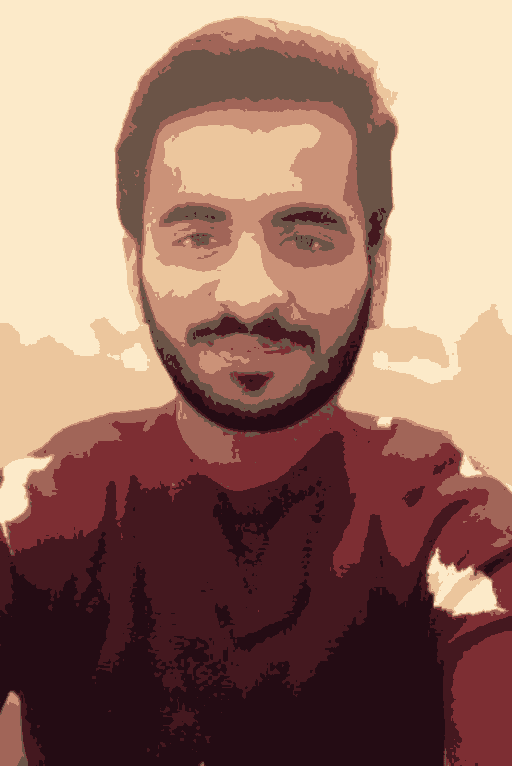

In [58]:
Image.fromarray(quantimage("./data/input/content/2022-01-01_268.png",8))

## Style 3 (segmentation)

In [30]:
import cv2
import numpy as np

In [32]:
imageP = "./data/input/content/2022-01-01_426.png"
image = cv2.imread(imageP)

max_width = 512
new_hieght = int((max_width/image.shape[1])*image.shape[0])
image = cv2.resize(image,((max_width,new_hieght)))

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# Perform adaptive threshold
edges  = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 9, 8)

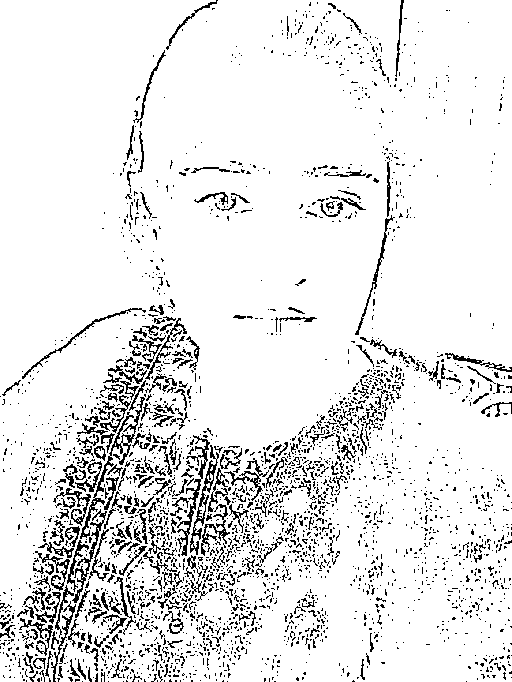

In [33]:
Image.fromarray(edges)

## Style 4 (segmentation)

In [34]:
import cv2
import numpy as np
from PIL import Image

In [35]:
imageP = "./data/input/content/2022-01-01_426.png"
image = cv2.cvtColor(cv2.imread(imageP),cv2.COLOR_BGR2RGB)

max_width = 512
new_hieght = int((max_width/image.shape[1])*image.shape[0])
image = cv2.resize(image,((max_width,new_hieght)))

In [36]:
def cartoonize(img, k):
    # Defining input data for clustering
    data = np.float32(img).reshape((-1, 3))
    # Defining criteria
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 1.0)
    # Applying cv2.kmeans function
    _, label, center = cv2.kmeans(data, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

    center = np.uint8(center)
    # Reshape the output data to the size of input image
    result = center[label.flatten()]
    result = result.reshape(img.shape)
    return result

In [39]:
cluster = cartoonize(image, 20)
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
# Perform adaptive threshold
edges  = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 9, 8)
blurred = cv2.medianBlur(cluster, 3)
# Combine the result and edges to get final cartoon effect
cartoon = cv2.bitwise_and(blurred, blurred, mask=edges)

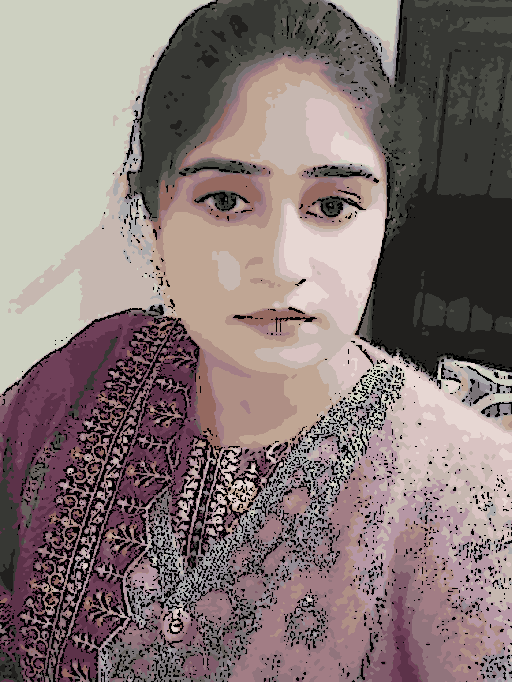

In [40]:
Image.fromarray(cartoon)

## style 5
- https://www.askpython.com/python/examples/images-into-cartoons

## Style 6

In [51]:
import cv2
import matplotlib.pyplot as plt
from PIL import Image, ImageEnhance

In [89]:
img = cv2.imread("./data/input/content/2022-01-01_135.png")

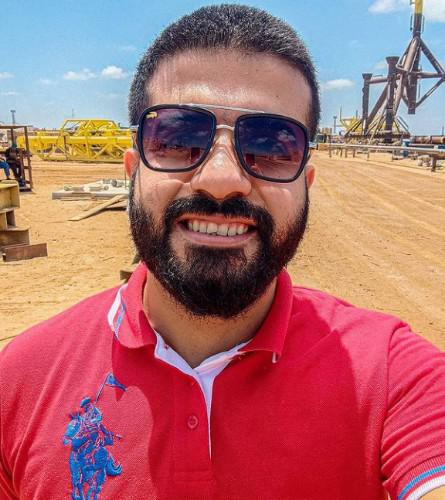

In [90]:
Image.fromarray(img[:,:,::-1])

In [91]:
# Step 1: Convert to Grey Image
grey_img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [92]:
# Step 2: Invert Image
invert_img=255-grey_img

In [93]:
# Step 3: Blur image
blur_img=cv2.GaussianBlur(invert_img, (111,111),0)

In [94]:
# Step 4: Invert Blurred Image
invblur_img=255-blur_img

In [95]:
# Step 5: Sketch
sketch_img=cv2.divide(grey_img,invblur_img, scale=256.0)

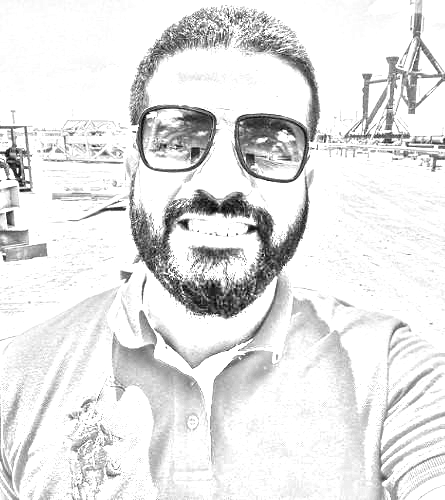

In [96]:
Image.fromarray(sketch_img)

In [97]:
th = sketch_img<240 

In [98]:
sketch_img2 = sketch_img

In [99]:
sketch_img2[th] = sketch_img[th] - 75

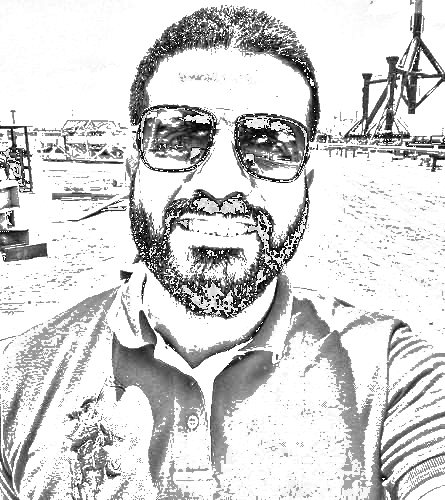

In [100]:
Image.fromarray(sketch_img2)